170498071/170498071 [==============================] - 3s 0us/step
Epoch 1/5
1563/1563 [==============================] - 162s 103ms/step - loss: 1.8126 - accuracy: 0.3565
Epoch 2/5
1563/1563 [==============================] - 141s 90ms/step - loss: 1.6230 - accuracy: 0.4279
Epoch 3/5
1563/1563 [==============================] - 178s 114ms/step - loss: 1.5432 - accuracy: 0.4569
Epoch 4/5
1563/1563 [==============================] - 198s 127ms/step - loss: 1.4817 - accuracy: 0.4787
Epoch 5/5
313/313 [==============================] - 12s 37ms/step
Classification report for ANN:
               precision    recall  f1-score   support

           0       0.64      0.52      0.57      1000
           1       0.54      0.69      0.61      1000
           2       0.42      0.33      0.37      1000
           3       0.36      0.37      0.36      1000
           4       0.44      0.36      0.40      1000
           5       0.44      0.36      0.40      1000
           6       0.51      0.57   

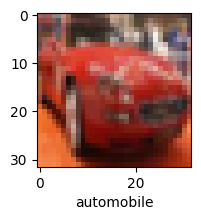

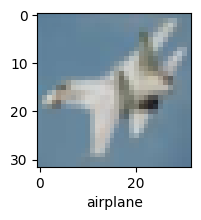

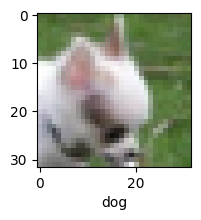

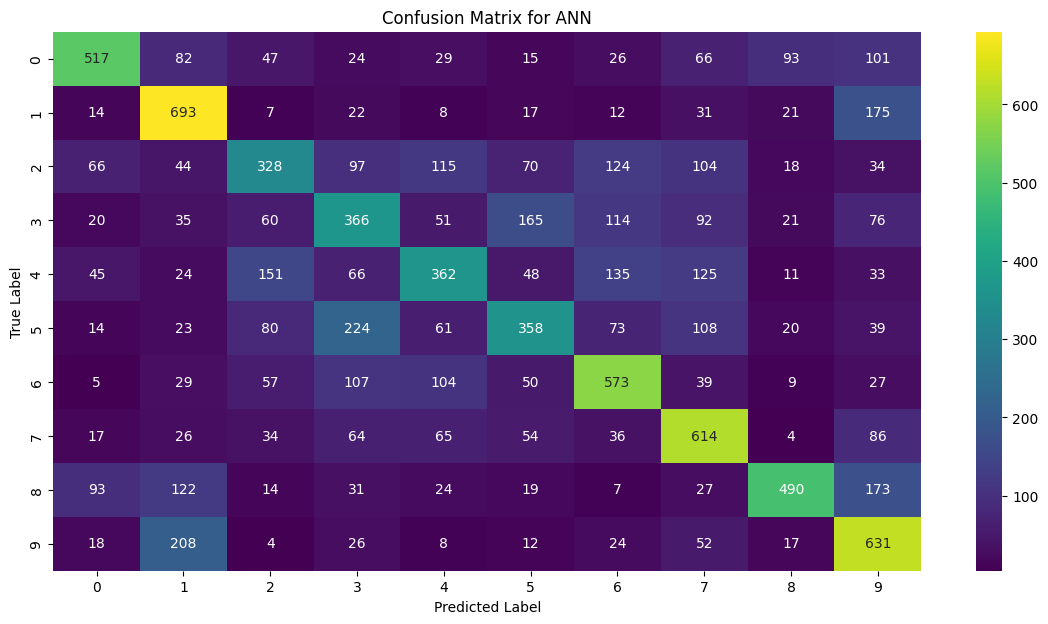

Epoch 1/10
1563/1563 [==============================] - 75s 47ms/step - loss: 1.4793 - accuracy: 0.4681
Epoch 2/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.1112 - accuracy: 0.6102
Epoch 3/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.9844 - accuracy: 0.6587
Epoch 4/10
1563/1563 [==============================] - 77s 50ms/step - loss: 0.9007 - accuracy: 0.6877
Epoch 5/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8391 - accuracy: 0.7070
Epoch 6/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7906 - accuracy: 0.7261
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7412 - accuracy: 0.7430
Epoch 8/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.6963 - accuracy: 0.7600
Epoch 9/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.6587 - accuracy: 0.7702
Epoch 10/10
313/313 [==============================] - 4s 11ms/s

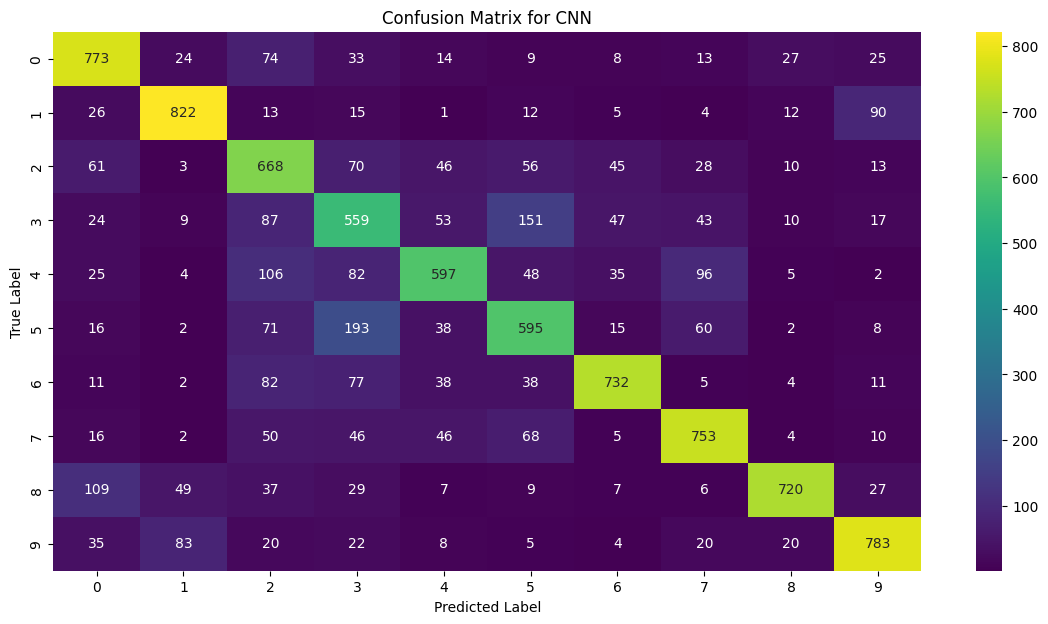

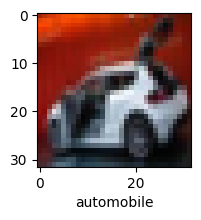

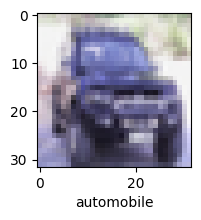

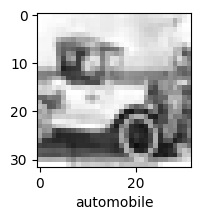

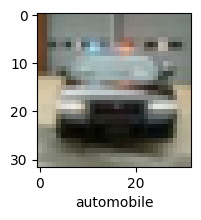

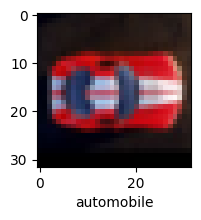

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

plot_sample(x_train, y_train, 5)
plot_sample(x_test, y_test, 10)
plot_sample(x_test, y_test, 2005)

x_train = x_train / 255.0
x_test = x_test / 255.0

ann = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)
ann.evaluate(x_test, y_test)

y_pred_ann = ann.predict(x_test)
y_pred_classes_ann = [np.argmax(element) for element in y_pred_ann]
print('Classification report for ANN:\n', classification_report(y_test, y_pred_classes_ann))

plt.figure(figsize=(14, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_classes_ann), annot=True, fmt='d', cmap='viridis')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for ANN')
plt.show()

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(x_train, y_train, epochs=10)
cnn.evaluate(x_test, y_test)

y_pred_cnn = cnn.predict(x_test)
y_pred_classes_cnn = [np.argmax(element) for element in y_pred_cnn]
print('Classification report for CNN:\n', classification_report(y_test, y_pred_classes_cnn))

plt.figure(figsize=(14, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_classes_cnn), annot=True, fmt='d', cmap='viridis')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for CNN')
plt.show()

# Find indices of 'car' class
car_indices = [i for i, label in enumerate(y_test) if label == 1]

# Plot some sample images of 'car' class
for index in car_indices[:5]:
    plot_sample(x_test, y_test, index)
